In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [73]:
data=pd.read_csv('IE684_lab08.csv')

In [74]:
with open("IE_684.txt") as my_file:
    print(my_file.read())

1. Title: Haberman's Survival Data

2. Sources:
   (a) Donor:   Tjen-Sien Lim (limt@stat.wisc.edu)
   (b) Date:    March 4, 1999

3. Past Usage:
   1. Haberman, S. J. (1976). Generalized Residuals for Log-Linear
      Models, Proceedings of the 9th International Biometrics
      Conference, Boston, pp. 104-122.
   2. Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984),
      Graphical Models for Assessing Logistic Regression Models (with
      discussion), Journal of the American Statistical Association 79:
      61-83.
   3. Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis,
      Department of Statistics, University of Wisconsin, Madison, WI.

4. Relevant Information:
   The dataset contains cases from a study that was conducted between
   1958 and 1970 at the University of Chicago's Billings Hospital on
   the survival of patients who had undergone surgery for breast
   cancer.

5. Number of Instances: 306

6. Number of Attributes: 4 (including the class attribute)

7. 

In [75]:
data.head()

,A,B,C,D
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [76]:
data.columns=['Age','Year','positive axillary nodes','survival status']

In [77]:
data.head()

,Age,Year,positive axillary nodes,survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [78]:
X_data=data[data.columns[:-1]]

In [79]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_data)
X_data=scaler.transform(X_data)

In [80]:
Y_data=data[data.columns[-1]]

In [81]:
from sklearn.model_selection import train_test_split
X_data_train,X_data_test,Y_data_train,Y_data_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=69)
len(X_data_train) , len(X_data_test) , len(Y_data_train) , len(Y_data_test)

(244, 62, 244, 62)

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k_values=[1,2,3,4,5]
accuracy_l1=[]
accuracy_l2=[]
for k in k_values:
  print('\n************************************')
  print('when k is:',k)
  neigh_l1 = KNeighborsClassifier(n_neighbors=k ,metric= 'manhattan' )
  neigh_l2= KNeighborsClassifier(n_neighbors=k  )
  neigh_l1.fit(X_data_train,Y_data_train)
  neigh_l2.fit(X_data_train,Y_data_train)
  pred_l1=neigh_l1.predict(X_data_test)
  pred_l2=neigh_l2.predict(X_data_test)

  print('accuracy with l1 matric:',accuracy_score(Y_data_test, pred_l1))
  print('accuracy with l2 matric:',accuracy_score(Y_data_test, pred_l2))
  accuracy_l1.append(accuracy_score(Y_data_test, pred_l1))
  accuracy_l2.append(accuracy_score(Y_data_test, pred_l2))
  





************************************
when k is: 1
accuracy with l1 matric: 0.6129032258064516
accuracy with l2 matric: 0.6290322580645161

************************************
when k is: 2
accuracy with l1 matric: 0.7096774193548387
accuracy with l2 matric: 0.6774193548387096

************************************
when k is: 3
accuracy with l1 matric: 0.6935483870967742
accuracy with l2 matric: 0.6935483870967742

************************************
when k is: 4
accuracy with l1 matric: 0.7258064516129032
accuracy with l2 matric: 0.7258064516129032

************************************
when k is: 5
accuracy with l1 matric: 0.7096774193548387
accuracy with l2 matric: 0.7258064516129032


**R] Repeat the same experiment for 60 : 40, 70 : 30 and 90 : 10. Report the results.**

In [83]:
split_ratio=[0.4,0.3,0.2,0.1]
accuracy_split_l1={}
accuracy_split_l2={}
for ratio in split_ratio:
  print('\n**************************************************')
  print('when split ratio is',(1-ratio)*100,':',ratio*100)
  X_data_train,X_data_test,Y_data_train,Y_data_test = train_test_split(X_data, Y_data, test_size=ratio, random_state=99)
  accuracy_l1=[]
  accuracy_l2=[]
  for k in k_values:
    print('\n************************************')
    print('when k is:',k)
    neigh_l1 = KNeighborsClassifier(n_neighbors=k ,metric= 'manhattan' )
    neigh_l2= KNeighborsClassifier(n_neighbors=k  )
    neigh_l1.fit(X_data_train,Y_data_train)
    neigh_l2.fit(X_data_train,Y_data_train)
    pred_l1=neigh_l1.predict(X_data_test)
    pred_l2=neigh_l2.predict(X_data_test)

    print('accuracy with l1 matric:',accuracy_score(Y_data_test, pred_l1))
    print('accuracy with l2 matric:',accuracy_score(Y_data_test, pred_l2))
    accuracy_l1.append(accuracy_score(Y_data_test, pred_l1))
    accuracy_l2.append(accuracy_score(Y_data_test, pred_l2))
  accuracy_split_l1[ratio]=accuracy_l1
  accuracy_split_l2[ratio]=accuracy_l2



**************************************************
when split ratio is 60.0 : 40.0

************************************
when k is: 1
accuracy with l1 matric: 0.6178861788617886
accuracy with l2 matric: 0.6178861788617886

************************************
when k is: 2
accuracy with l1 matric: 0.6747967479674797
accuracy with l2 matric: 0.6910569105691057

************************************
when k is: 3
accuracy with l1 matric: 0.6097560975609756
accuracy with l2 matric: 0.6422764227642277

************************************
when k is: 4
accuracy with l1 matric: 0.6747967479674797
accuracy with l2 matric: 0.6666666666666666

************************************
when k is: 5
accuracy with l1 matric: 0.6504065040650406
accuracy with l2 matric: 0.6585365853658537

**************************************************
when split ratio is 70.0 : 30.0

************************************
when k is: 1
accuracy with l1 matric: 0.6195652173913043
accuracy with l2 matric: 0.630434782608695

$\large \text{Plot the graph between k(Number of Clusters) vs test − accuracy for all the different training and test data
splits.}$

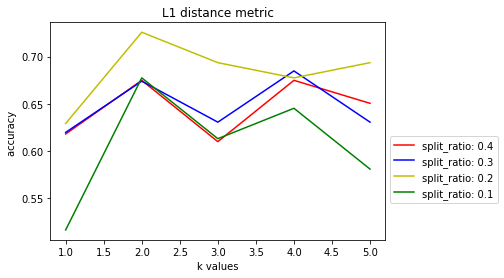

In [84]:
plt.plot(k_values,accuracy_split_l1[split_ratio[0]],color='r',label=f'split_ratio: {split_ratio[0]}')
plt.plot(k_values,accuracy_split_l1[split_ratio[1]],color='b',label=f'split_ratio: {split_ratio[1]}')
plt.plot(k_values,accuracy_split_l1[split_ratio[2]],color='y',label=f'split_ratio: {split_ratio[2]}')
plt.plot(k_values,accuracy_split_l1[split_ratio[3]],color='g',label=f'split_ratio: {split_ratio[3]}')

plt.title('L1 distance metric')
plt.xlabel('k values')
plt.ylabel('accuracy ')
plt.legend(bbox_to_anchor=(1,0.5))
plt.show()

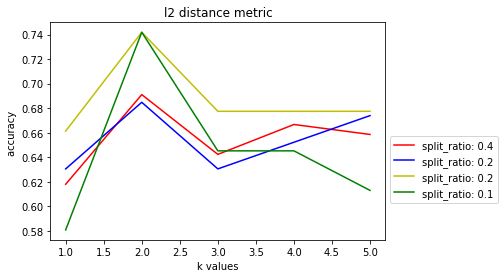

In [85]:
plt.plot(k_values,accuracy_split_l2[split_ratio[0]],color='r',label=f'split_ratio: {split_ratio[0]}')
plt.plot(k_values,accuracy_split_l2[split_ratio[1]],color='b',label=f'split_ratio: {split_ratio[2]}')
plt.plot(k_values,accuracy_split_l2[split_ratio[2]],color='y',label=f'split_ratio: {split_ratio[2]}')
plt.plot(k_values,accuracy_split_l2[split_ratio[3]],color='g',label=f'split_ratio: {split_ratio[3]}')

plt.title('l2 distance metric')
plt.xlabel('k values')
plt.ylabel('accuracy ')
plt.legend(bbox_to_anchor=(1,0.5))
plt.show()
